In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# --- Phase 1: Data Cleaning and Feature Engineering ---

# Load the original dataset from the uploaded file
df = pd.read_csv('churn.csv')

In [17]:
df.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [18]:
df_dtype = pd.DataFrame({
    'column': df.columns,
    'data_type': df.dtypes.values,
    'num_rows': [df.shape[0]] * df.shape[1],
    'num_unique': df.nunique().values,
    'num_missing': df.isnull().sum().values,
    'percent_missing': (df.isnull().mean() * 100).values,
    'duplicate_rows': [df.duplicated().sum()] + [np.nan] * (df.shape[1] - 1),
    'example_values': [df[col].dropna().unique()[:3] for col in df.columns]
})

df_dtype

,column,data_type,num_rows,num_unique,num_missing,percent_missing,duplicate_rows,example_values
0,Unnamed: 0,int64,36992,36992,0,0.000000,0.0,"[0, 1, 2]"
1,age,int64,36992,55,0,0.000000,NaN,"[18, 32, 44]"
2,gender,object,36992,3,0,0.000000,NaN,"[F, M, Unknown]"
3,security_no,object,36992,36992,0,0.000000,NaN,"[XW0DQ7H, 5K0N3X1, 1F2TCL3]"
4,region_category,object,36992,3,5428,14.673443,NaN,"[Village, City, Town]"
5,membership_category,object,36992,6,0,0.000000,NaN,"[Platinum Membership, Premium Membership, No M..."
6,joining_date,object,36992,1096,0,0.000000,NaN,"[2017-08-17, 2017-08-28, 2016-11-11]"
7,joined_through_referral,object,36992,3,0,0.000000,NaN,"[No, ?, Yes]"
8,referral_id,object,36992,11359,0,0.000000,NaN,"[xxxxxxxx, CID21329, CID12313]"
9,preferred_offer_types,object,36992,3,288,0.778547,NaN,"[Gift Vouchers/Coupons, Credit/Debit Card Offe..."


In [19]:
# Standardize missing value representation
df.replace('?', np.nan, inplace=True)

# Correct data types for specific columns
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')
df['joining_date'] = pd.to_datetime(df['joining_date'])

# Drop identifier columns and the original time column
df.drop(['Unnamed: 0', 'referral_id', 'security_no', 'last_visit_time'], axis=1, inplace=True, errors='ignore')

# Feature Engineering: Create a 'customer_tenure_days' feature
# Using a fixed reference date ensures that rerunning the code produces the same result
reference_date = pd.to_datetime('2025-01-01')
df['customer_tenure_days'] = (reference_date - df['joining_date']).dt.days

# CRITICAL FIX: Drop the original 'joining_date' column after use
df.drop('joining_date', axis=1, inplace=True)

# --- Phase 2: Missing Value Imputation ---

# Impute categorical columns with the most frequent value (mode)
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Impute numerical columns with the median to resist outliers
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)


C:\Users\anvm1\AppData\Local\Temp\ipykernel_5296\1884756965.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
C:\Users\anvm1\AppData\Local\Temp\ipykernel_5296\1884756965.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [20]:
df_dtype = pd.DataFrame({
    'column': df.columns,
    'data_type': df.dtypes.values,
    'num_rows': [df.shape[0]] * df.shape[1],
    'num_unique': df.nunique().values,
    'num_missing': df.isnull().sum().values,
    'percent_missing': (df.isnull().mean() * 100).values,
    'duplicate_rows': [df.duplicated().sum()] + [np.nan] * (df.shape[1] - 1),
    'example_values': [df[col].dropna().unique()[:3] for col in df.columns]
})

df_dtype

,column,data_type,num_rows,num_unique,num_missing,percent_missing,duplicate_rows,example_values
0,age,int64,36992,55,0,0.0,0.0,"[18, 32, 44]"
1,gender,object,36992,3,0,0.0,NaN,"[F, M, Unknown]"
2,region_category,object,36992,3,0,0.0,NaN,"[Village, City, Town]"
3,membership_category,object,36992,6,0,0.0,NaN,"[Platinum Membership, Premium Membership, No M..."
4,joined_through_referral,object,36992,2,0,0.0,NaN,"[No, Yes]"
5,preferred_offer_types,object,36992,3,0,0.0,NaN,"[Gift Vouchers/Coupons, Credit/Debit Card Offe..."
6,medium_of_operation,object,36992,3,0,0.0,NaN,"[Desktop, Smartphone, Both]"
7,internet_option,object,36992,3,0,0.0,NaN,"[Wi-Fi, Mobile_Data, Fiber_Optic]"
8,days_since_last_login,int64,36992,27,0,0.0,NaN,"[17, 16, 14]"
9,avg_time_spent,float64,36992,25961,0,0.0,NaN,"[300.63, 306.34, 516.16]"


In [21]:
# --- Phase 3: Data Transformation for Modeling ---

# Separate features (X) from the target variable (y)
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

# One-Hot Encode all categorical features to convert them to numbers
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Identify the final list of numerical columns for scaling
numerical_cols = X.select_dtypes(include=np.number).columns

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features using StandardScaler
# Fit on the training data to learn the scaling parameters
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# Apply the same transformation to the test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [22]:
# --- Phase 4: Model Building and Evaluation ---

# Initialize and train the Logistic Regression model
# Increased 'max_iter' for better convergence
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the unseen test data
y_pred = model.predict(X_test)


In [23]:
# --- Phase 5: Report Results ---

print("--- Model Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


--- Model Evaluation Results ---
Accuracy: 0.8967

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3396
           1       0.92      0.88      0.90      4003

    accuracy                           0.90      7399
   macro avg       0.90      0.90      0.90      7399
weighted avg       0.90      0.90      0.90      7399


Confusion Matrix:
[[3093  303]
 [ 461 3542]]



📊 Confusion matrix visualization has been saved as 'confusion_matrix.png'


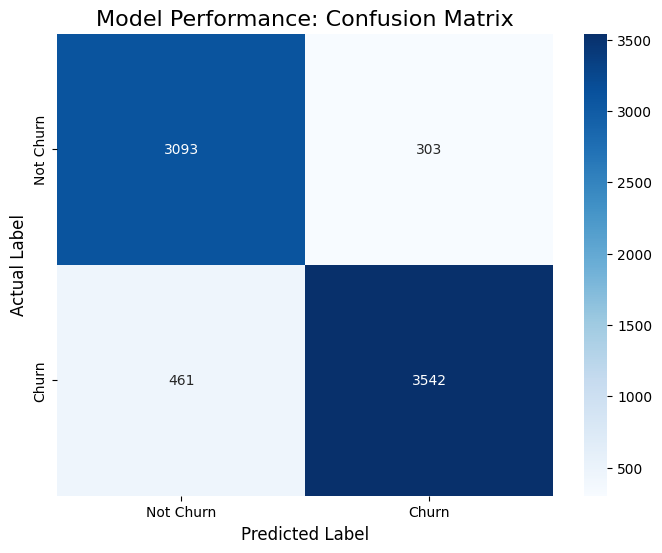

In [24]:
# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Model Performance: Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.savefig('confusion_matrix.png')

print("\n📊 Confusion matrix visualization has been saved as 'confusion_matrix.png'")

In [25]:
# --- Phase 3: Data Transformation ---
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
numerical_cols = X.select_dtypes(include=np.number).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# --- Phase 4: Model Training and Comparison ---
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.8967
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3396
           1       0.92      0.88      0.90      4003

    accuracy                           0.90      7399
   macro avg       0.90      0.90      0.90      7399
weighted avg       0.90      0.90      0.90      7399

--- Random Forest ---
Accuracy: 0.9303
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3396
           1       0.92      0.95      0.94      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399

--- XGBoost ---
Accuracy: 0.9324
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3396
           1       0.92      0.95      0.94      4003

    accuracy                           0.93      7399
   macro av

c:\Andrew_Vu\Projects\customer_churn_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:

# --- Phase 5: Feature Importance Analysis ---
# We'll use the best model (typically Random Forest or XGBoost for this)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_model


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [30]:

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.head(10)


,feature,importance
12,membership_category_No Membership,0.213235
14,membership_category_Premium Membership,0.159564
13,membership_category_Platinum Membership,0.155178
5,points_in_wallet,0.137482
15,membership_category_Silver Membership,0.073814
11,membership_category_Gold Membership,0.060544
35,feedback_Reasonable Price,0.026386
34,feedback_Quality Customer Care,0.022429
33,feedback_Products always in Stock,0.021450
37,feedback_User Friendly Website,0.021116


C:\Users\anvm1\AppData\Local\Temp\ipykernel_5296\1502000578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')



Feature importance plot saved as 'feature_importance.png'


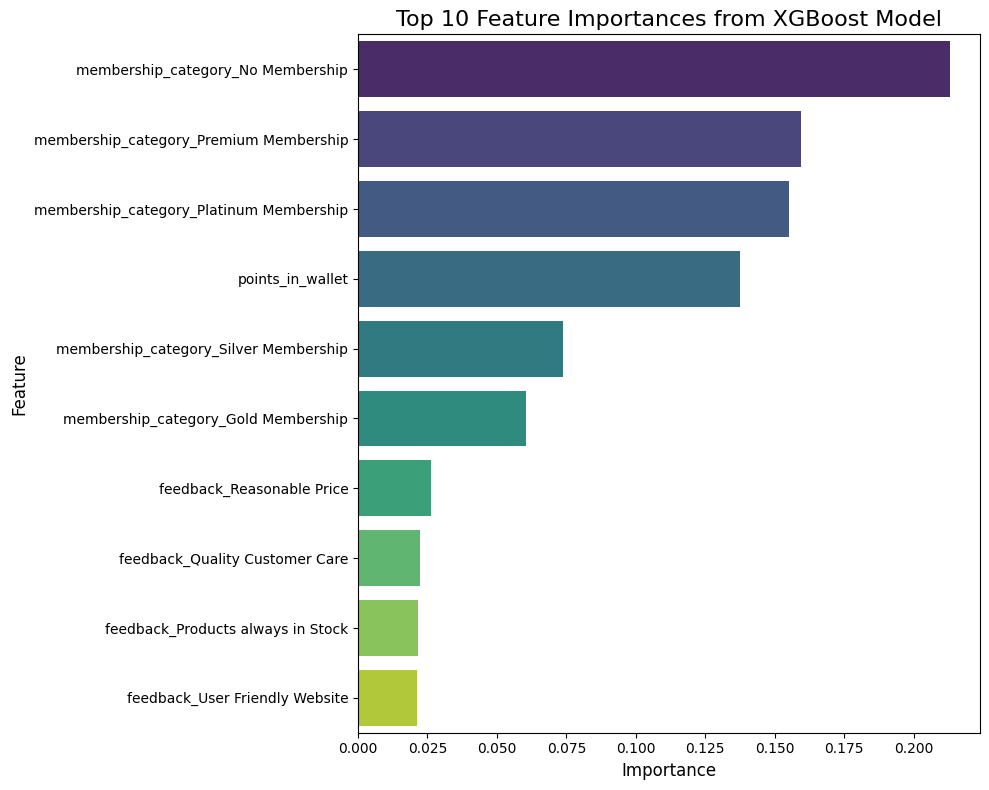

In [28]:

# Visualize the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title(f'Top 10 Feature Importances from {best_model_name} Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
#plt.savefig('feature_importance.png')
print("\nFeature importance plot saved as 'feature_importance.png'")